# $\text{Fresnel diffraction from two-slit apertures}$
### $\textit{Numerical analysis}$

##### $\textbf{Author:}$ $\text{Edy Alberto Flores Leal}$

---
---

For the theoretical description of the diffraction theory and the Fresnel diffraction phenomenon produced in a two-slit aperture, consult the additional document uploaded in this folder. Without further ado, we start the analysis, we first call all the libraries we need.

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,          # linewidth
    'text.usetex': True,           # LaTeX font
    'font.family': 'sans serif',   # Serif family
    'font.size': 20,               # font size
    'axes.titlesize': 26,          # title size
    'axes.grid': True,             # grid
    'grid.linestyle': "-.",        # grid style
    'axes.facecolor': '#ECECEC',   # Background color for the axes
    'figure.facecolor': '#FFFFFF', # Background color for the figure
    'legend.facecolor': '#FFFFFF'  # Background color for the legend
})

Here, we import $\textcolor{blue}{\texttt{scipy.special}}$ to compute the the values of each Fresnel integral needed. Also, we define the physical parameters based on the choices of Lock (1987), that is, we are using the parameters $2 a = 0.5 \: \mathrm{mm}, 2 d = 2.0 \: \mathrm{mm}, \lambda = 0.55 \: \mathrm{\mu m}$.

In [ ]:
# Physical parameters
a = 2.5e-4 # width                     (m)
λ = 5.5e-7 # wavelength                (m)
d = 1.0e-3 # interior edges separation (m) 

Now, we define a function that performs all the required computations. 

In [ ]:
# Irradiance evaluation function
def irradiance(xmax, λ, D, d):
    x = np.linspace(-xmax, xmax, 1000)   # domain of integration 
    X = x / xmax                         # normalized distance

    # Fresnel parameters
    α = np.sqrt(2 / (λ * D)) * (x + d + 2 * a)
    β = np.sqrt(2 / (λ * D)) * (x + d)
    γ = np.sqrt(2 / (λ * D)) * (x - d)
    δ = np.sqrt(2 / (λ * D)) * (x - d - 2 * a)
    
    # Fresnel integrals
    Sa, Ca = sc.fresnel(α)
    Sb, Cb = sc.fresnel(β)
    Sg, Cg = sc.fresnel(γ)
    Sd, Cd = sc.fresnel(δ)
    return X, 0.25 * (np.power(Ca + Cg - Cb - Cd, 2) + np.power(Sa + Sg - Sb - Sd, 2))

Here, we define the following parameters:
- $x_{\mathrm{max}}$: input that represents the distance from the center of the screen to the edge.
- $x$: distance array.
- $X$: normalized distance.
- $\alpha, \beta, \gamma, \delta$: limits of integration of the Fresnel integral.
- $\mathrm{S}_{\alpha}, \mathrm{C}_{\alpha}$, and similars: Fresnel integrals.

We use the normalized distances and irradiances as output. Hence we can perform the analysis. For instance, we consider the next three cases:
- Case 1: $x_{\mathrm{max}} = 1.75\times 10^{-3}\:\mathrm{m}$ and $D = 0.016\:\mathrm{m}$.
- Case 2: $x_{\mathrm{max}} = 4.45\times 10^{-3}\:\mathrm{m}$ and $D = 1.62\:\mathrm{m}$.
- Case 3: $x_{\mathrm{max}} = 1.78\times 10^{-2}\:\mathrm{m}$ and $D = 6.46\:\mathrm{m}$.

We declare this as follows:

In [5]:
# --- Cases ---
# Case 1: xmax = 0.00175 m ; D = 0.016 m
X1, I1 = irradiance(1.75e-3, λ, 1.6e-2, d)

# Case 2: xmax = 0.00440 m ; D = 1.62 m
X2, I2 = irradiance(4.45e-3, λ, 1.62, d)

# Case 3: xmax = 0.01780 m ; D = 6.46 m
X3, I3 = irradiance(1.78e-2, λ, 6.46, d)

Finally, we plot our results:

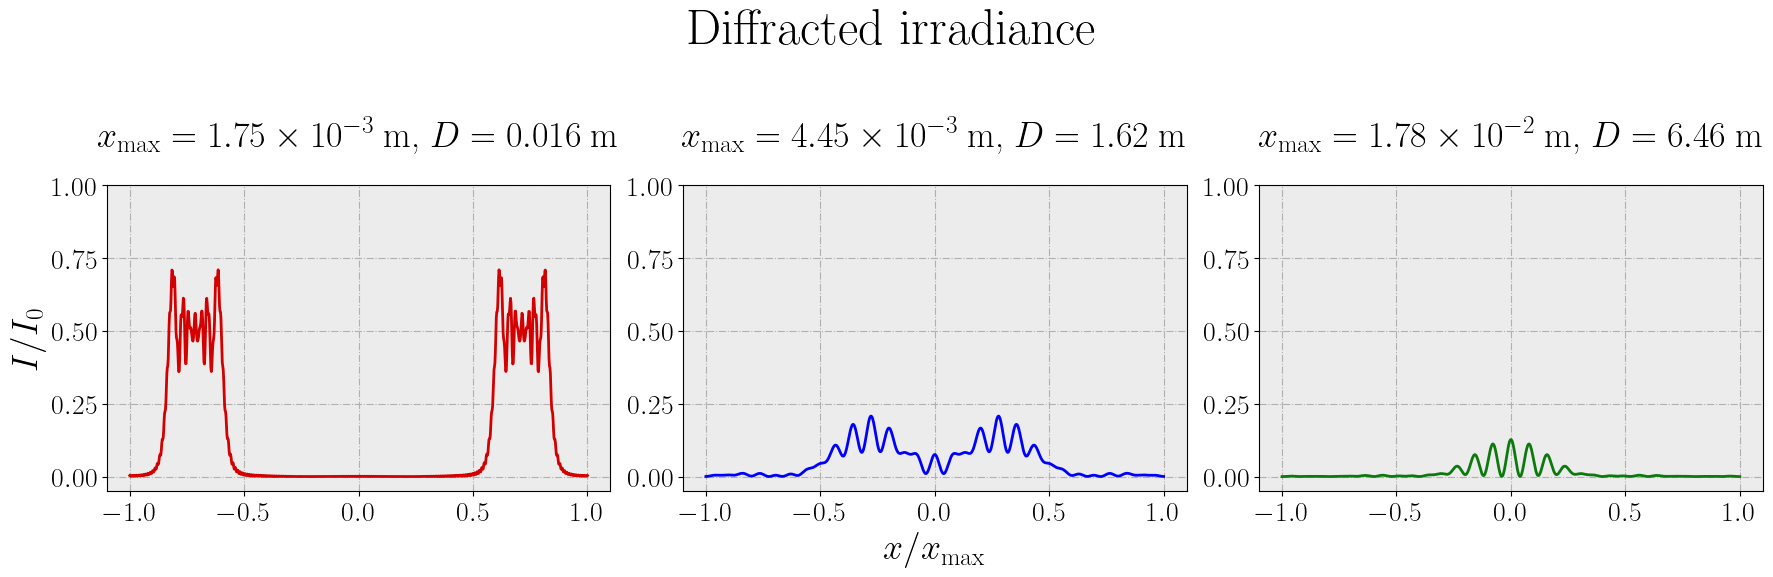

In [6]:
# Plot
plt.figure(figsize = (18, 6))

plt.subplot(1, 3, 1)
plt.plot(X1, I1, color = '#D40000')
plt.ylabel(r'$I / I_{0}$', size = 26)
plt.ylim(-0.05, 1)
plt.title(r'$x_{\mathrm{max}} = 1.75 \times 10^{-3} \: \mathrm{m}$, $D = 0.016 \: \mathrm{m}$', y = 1.1)

plt.subplot(1, 3, 2)
plt.plot(X2, I2, color = '#0000FF')
plt.xlabel(r'$x / x_{\mathrm{max}}$', size = 26)
plt.ylim(-0.05, 1)
plt.title(r'$x_{\mathrm{max}} = 4.45 \times 10^{-3} \: \mathrm{m}$, $D = 1.62 \: \mathrm{m}$', y = 1.1)

plt.subplot(1, 3, 3)
plt.plot(X3, I3, color = '#0B790B')
plt.ylim(-0.05, 1)
plt.title(r'$x_{\mathrm{max}} = 1.78 \times 10^{-2} \: \mathrm{m}$, $D = 6.46 \: \mathrm{m}$', y = 1.1)

plt.suptitle(r'Diffracted irradiance', size = 36)
plt.tight_layout()

The first plot (left) reflects the expected behavior since it is inside the Fresnel regime. The second plot (center) reflects the zone where Fraunhofer diffraction starts to overcome Fresnel diffraction. The last plot (right) reflects the behavior of the diffraction pattern within the Fraunhofer limit (Lock, 1987).

---
---

# $\text{References}$
1. Max Born and Emil Wolf. *Principles of Optics*. Cambridge University Press, December 2019.

2. Grant R Fowles. *Introduction to modern optics*. Dover Books on Physics. Dover Publications, June 1989.

3. J. Goodman. *Introduction to Fourier Optics*. Roberts and Company Publishers, 3 edition, 2005.

4. John David Jackson. *Classical electrodynamics; 3rd ed*. Wiley, New York, NY, 1998.

5. James A. Lock. Numerical methods in optics: A course about learning physics through computing. *American Journal of Physics*, 55(12):1121–1125, December 1987. doi: 10.1119/1.15257.

6. Frank L Pedrotti, Leno S Pedrotti, and Leno M Pedrotti. *Introduction to Optics*. Pearson, Upper Saddle River, NJ, 3 edition, April 2006.

7. Bahaa E. A. Saleh and Malvin Carl Teich. *Fundamentals of Photonics*. Wiley, August 1991.